# Module 3: Performance measurements of Logistic Regression.


In [1]:
# Import the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load given dataset.
data = pd.read_csv('Dataset.csv')

In [4]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
df = data.dropna()

In [6]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [7]:
df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [8]:
del df['UDI']
del df['Product ID']
del df['Failure Type']

In [9]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Type']

for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [12]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='Target', axis=1)
#Response variable
Y = df.loc[:,'Target']

In [13]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0
9996,0,298.9,308.4,1632,31.8,17,0
9997,2,299.0,308.6,1645,33.4,22,0
9998,0,299.0,308.7,1408,48.5,25,0


In [14]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=1)
x_ros,y_ros=ros.fit_resample(X,Y)
print("OUR DATASET COUNT         : ", Counter(Y))
print("OVER SAMPLING DATA COUNT  : ", Counter(y_ros))

OUR DATASET COUNT         :  Counter({0: 9661, 1: 339})
OVER SAMPLING DATA COUNT  :  Counter({0: 9661, 1: 9661})


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.30, random_state=1, stratify=y_ros)
print("Number of training dataset : ", len(x_train))
print("Number of test dataset     : ", len(x_test))
print("Total number of dataset    : ", len(x_train)+len(x_test))

Number of training dataset :  13525
Number of test dataset     :  5797
Total number of dataset    :  19322


#### Implementing Logistic regression

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

Training

In [17]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predictLR =LR.predict(x_test)

Finding Accuracy

In [18]:
accuracy = accuracy_score(y_test, predictLR)
print("Accuracy of LogisticRegression:", accuracy *100)

Accuracy of LogisticRegression: 82.19768845954805


Finding classification report

In [19]:
cr = classification_report(y_test, predictLR)
print("Classification report \n\n:", cr)

Classification report 

:               precision    recall  f1-score   support

           0       0.82      0.83      0.82      2898
           1       0.83      0.82      0.82      2899

    accuracy                           0.82      5797
   macro avg       0.82      0.82      0.82      5797
weighted avg       0.82      0.82      0.82      5797



In [20]:
cm = confusion_matrix(y_test, predictLR)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[2397  501]
 [ 531 2368]]


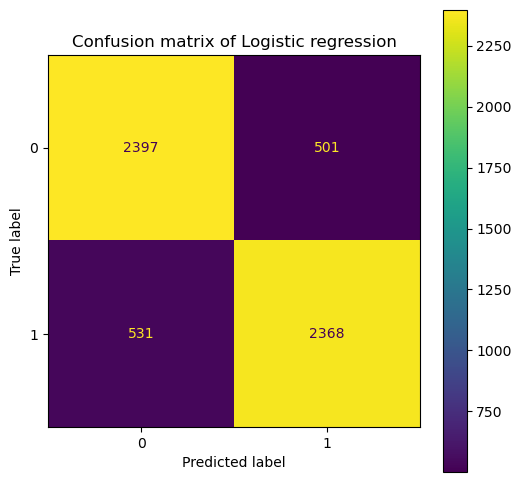

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(LR, x_test, y_test, ax=ax)
plt.title('Confusion matrix of Logistic regression')
plt.show()

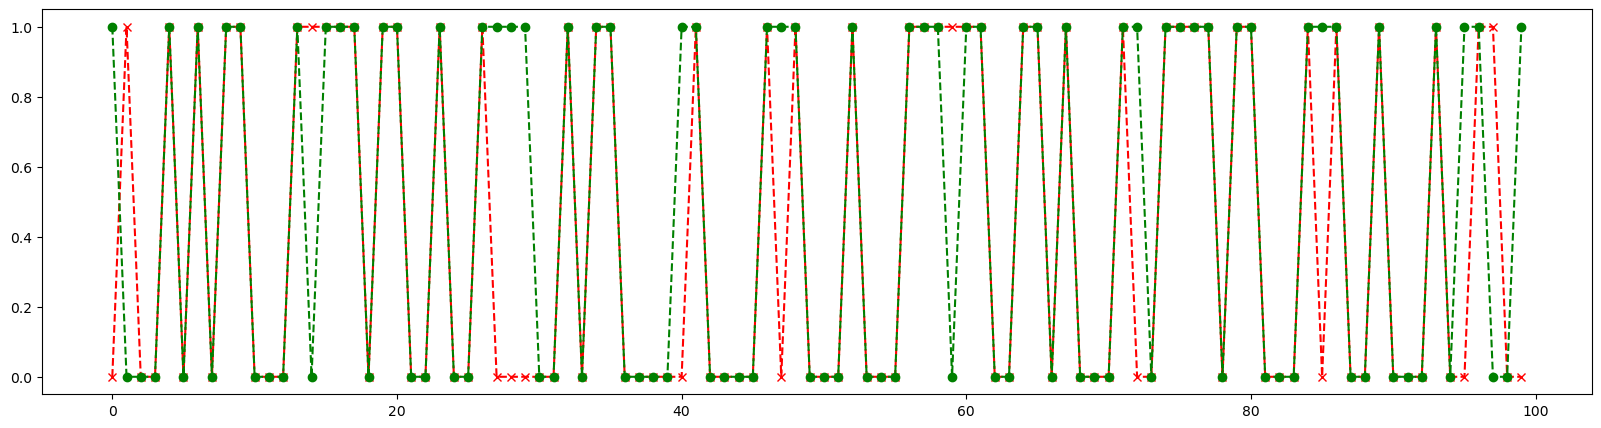

In [22]:
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predictLR
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()